# RSI Base Code (Taken from Canvas)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


[*********************100%%**********************]  1 of 1 completed


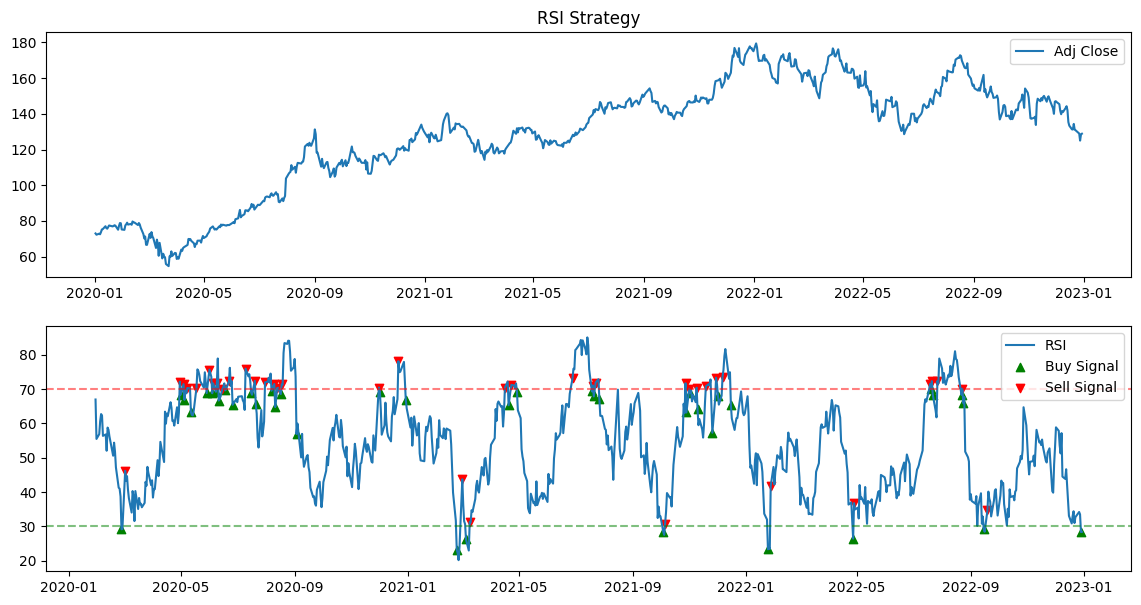

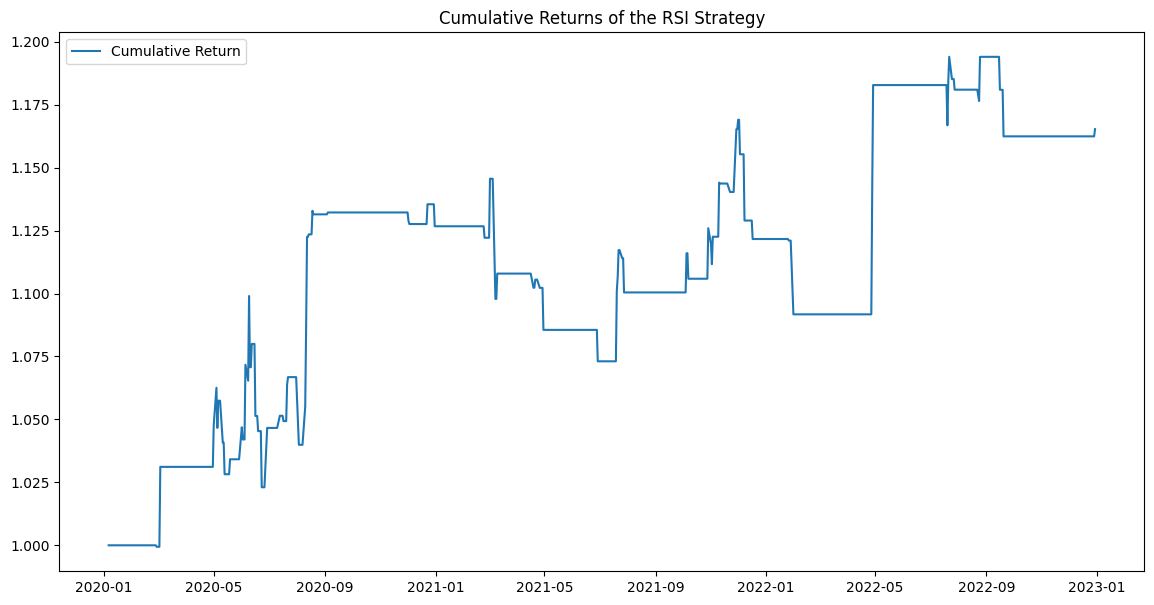

In [ ]:
# Define the stock and RSI period
stock = 'AAPL'
rsi_period = 20

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate RSI
data = pd.DataFrame(data)
delta = data['Adj Close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=rsi_period).mean()
avg_loss = pd.Series(loss).rolling(window=rsi_period).mean()
rs = avg_gain / avg_loss
data['RSI'] = (100 - (100 / (1 + rs))).values

# Identify buy and sell signals
data['Signal'] = 0.0
data['Signal'][rsi_period:] = np.where(data['RSI'][rsi_period:] < 30, 1.0, np.where(data['RSI'][rsi_period:] > 70, -1.0, 0.0))
data['Position'] = data['Signal'].diff()

# Plot the closing price and RSI
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adj Close')
plt.title('RSI Strategy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.scatter(data.index[data['Position'] == 1], data['RSI'][data['Position'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Position'] == -1], data['RSI'][data['Position'] == -1], marker='v', color='red', label='Sell Signal')
plt.legend()

plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the RSI Strategy')
plt.legend()
plt.show()

# Trading Bot

In [ ]:
!pip install alpaca-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
import json
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo

import alpaca

from alpaca.data.live.stock import *
from alpaca.data.historical.stock import *
from alpaca.data.requests import *
from alpaca.data.timeframe import *
from alpaca.trading.client import *
from alpaca.trading.stream import *
from alpaca.trading.requests import *
from alpaca.trading.enums import *
# Set your API key and secret
api_key = 'PKLD2YRF1K7EB2GG9Y80'
secret = 'Qjq5bVFaIDEtFrz4BP1eKb5PLcD3Xvbpy2UY7kVP'
# Use paper trading base URL for testing
paper = 'https://paper-api.alpaca.markets/v2'

# Initialize Alpaca API


# Get historical market data
symbol = 'AAPL'  # Replace with your desired stock symbol

## Backtesting from Historical Data

In [ ]:
stock_historical_data_client = StockHistoricalDataClient(api_key, secret)

# get historical bars by symbol
# reference: https://docs.alpaca.markets/reference/stockbars-1
now = datetime.now(ZoneInfo("America/New_York"))
# Create a request for historical bar data
request_params = StockBarsRequest(
    symbol_or_symbols=[symbol],  # Stock symbol
    timeframe=TimeFrame.Minute,     # Time frame for each bar
    start=datetime(2024, 7, 22),  # Start date for the data
    end=datetime.date(now)    # End date for the data
)

# Get the historical data
historical_data = stock_historical_data_client.get_stock_bars(request_params)

# Convert to dataframe
historical_data = historical_data.df
# Converting datetime to be able to put in excel
new_index = [t[1].tz_convert(None) for t in historical_data.index]
historical_data.index = pd.Index(new_index, name='timestamp')
historical_data.head(15)

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2024-07-22 08:00:00,224.35,225.30,224.35,225.30,1827.0,143.0,225.105255
2024-07-22 08:01:00,225.30,225.45,225.30,225.45,2465.0,92.0,225.406264
2024-07-22 08:06:00,225.30,225.30,225.30,225.30,938.0,22.0,225.303241
2024-07-22 08:08:00,225.30,225.30,225.27,225.27,678.0,24.0,225.285900
2024-07-22 08:10:00,225.30,225.30,225.30,225.30,660.0,22.0,225.315394
2024-07-22 08:13:00,225.37,225.37,225.33,225.33,1271.0,37.0,225.350157
2024-07-22 08:14:00,225.34,225.34,225.34,225.34,388.0,13.0,225.353995
2024-07-22 08:16:00,225.33,225.33,225.33,225.33,707.0,24.0,225.336266
2024-07-22 08:18:00,225.33,225.33,225.31,225.31,957.0,32.0,225.293908


### Testing for ideal window

In [ ]:
# Function to test window and return dataset

def test_data(window, data):
  data_copy = data.copy()
  # RSI calculations (taken from canvas notes)
  delta = data_copy['close'].diff()
  gain = np.where(delta > 0, delta, 0)
  loss = np.where(delta < 0, -delta, 0)
  avg_gain = pd.Series(gain).rolling(window=window).mean()
  avg_loss = pd.Series(loss).rolling(window=window).mean()
  rs = avg_gain / avg_loss
  # Adding data to the  dataset to be returned.
  data_copy['RSI'] = (100 - (100 / (1 + rs))).values
  data_copy['Signal'] = 0.0
  data_copy['Signal'][window:] = np.where(data_copy['RSI'][window:] < 30, 1.0, np.where(data_copy['RSI'][window:] > 70, -1.0, 0.0))
  data_copy['Position'] = data_copy['Signal'].diff()
  data_copy['Return'] = data_copy['close'].pct_change()
  data_copy['Strategy Return'] = data_copy['Return'] * data_copy['Position'].shift()
  data_copy['Cumulative Return'] = (1 + data_copy['Strategy Return']).cumprod()
  return data_copy



In [ ]:
# for loop to test different window sizes
results = {}

for test_window in range(1, 100):
  data_test = test_data(test_window, historical_data)
  results[test_window] = data_test


max = 0
max_loc = 0
for i in results:
  if (results[i]['Cumulative Return'].iloc[-1] - 1)* 100 > max:
    max = (results[i]['Cumulative Return'].iloc[-1] - 1)* 100
    max_loc = i
  print(f"{i}: {(results[i]['Cumulative Return'].iloc[-1] - 1)* 100}")

print(f"\n{max_loc}: {max}")

1: 15.524106542354055
2: 18.357800365429135
3: 14.719940012488397
4: 13.145669376706559
5: 14.265540870538128
6: 10.90150725339074
7: 9.841385562049743
8: 9.800117555146493
9: 6.609551377528877
10: 7.549600506444154
11: 11.468569811142704
12: 9.32065382039573
13: 2.3689476429372025
14: 6.390907036578941
15: 5.171524315122045
16: 6.664629494784946
17: 8.711531593162668
18: 5.864489073688017
19: 3.6980492200169746
20: 4.64024964078984
21: 3.1854729202315024
22: 3.6686269264661675
23: 1.5493930561867542
24: 4.436245298708785
25: 1.148441202099404
26: 2.089077986752663
27: 1.1616976865843176
28: 1.5440307996900549
29: 2.6020409118869825
30: 2.008138579402119
31: 2.5983393917194064
32: 0.22758699208340616
33: 0.743939477820188
34: 1.6386967709166145
35: -0.5713537623355358
36: -0.04927226019344477
37: 0.8508934994518214
38: 0.36799387793897687
39: 0.540682858012631
40: 0.30804707523270913
41: 0.5437908054719998
42: -0.43255903779121363
43: 0.7834503993612074
44: -0.9744163785829874
45: 1.83

As can be seen, the window size of 2 has the largest cumulative return.

# Live Bot Trading

In [ ]:
!pip install alpaca_trade_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Successfully uninstalled msgpack-1.0.8
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
# Necessary Libraries
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Required to run asyncio functions within a jupyter notebook
import asyncio
import nest_asyncio
nest_asyncio.apply()

# Mounting google drive for data storage
from google.colab import drive
drive.mount('/content/drive')

# Initialize Alpaca API, secret, and trading URL
api_key = 'PKLD2YRF1K7EB2GG9Y80'
secret = 'Qjq5bVFaIDEtFrz4BP1eKb5PLcD3Xvbpy2UY7kVP'
paper = 'https://paper-api.alpaca.markets'

# Setting up API, symbol, and window size
api = tradeapi.REST(api_key, secret, paper, api_version='v2')
account = api.get_account()
symbol = 'AAPL'
window = 2

# Path to excel file within google drive.
live_path = '/content/drive/MyDrive/AAPL_live_data.xlsx'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setup excel. Gets the current information and sends it to the excel file.
# Replaces everything in the excel file.
# DO NOT RUN FOR EXISTING EXCEL FILE CONTAINING DATA

"""latest_bar = api.get_latest_bar(symbol)
data = [{
  'time': latest_bar.t.tz_convert(None),
  'close': latest_bar.c,
  'portf value': account.equity,
  'buying_power': account.buying_power,
  'cash': account.cash,
  'PnL': float(account.equity) - float(account.last_equity),
  'rsi' : 50
  }]
data = pd.DataFrame(data)
data.to_excel(live_path, index=False)"""

In [ ]:
# Simple market order function. Submits a market order to buy or sell the symbol
# at the given quantity. side -> 'buy' or 'sell'
def market_order(symbol, qty, side):
  res = api.submit_order(symbol, qty = qty, side=side, type='market', time_in_force='day')

In [ ]:
# Reads in current data from the excel file storage.
data = pd.read_excel(live_path)
#print(data.head(5))

# Using data.shape[0] lets us find the last index of the excel file.
# excel_loc isn't used for anything other than checking we have enough room
# to calculate the RSI with the given window.
excel_loc = data.shape[0] + 1

# Function to get data from the api calls and return it as a dataset.
def get_data(latest_bar, account, data, window, excel_loc):
  # default 50
  rsi = 50

  # Checks if we can calculate the RSI with the window size,
  # otherwise will throw an index error.
  if excel_loc > window:
    # Gets the trailing window of recorded data to calculate RSI
    # Same RSI equation as in canvas documentation.
    delta = data['close'].iloc[-window:].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).mean()
    avg_loss = pd.Series(loss).mean()
    # prevents divide by 0 error
    rs = avg_gain / (avg_loss+ 0.000001)
    rsi = 100 - (100 / (1 + rs))
    #print(f"avg_gain: {avg_gain} avg_loss: {avg_loss} rs: {rs} rsi: {rsi}")

  # Assembles relevant data into a dictionary and returns as a dataset.
  new_data = [{
  'time': latest_bar.t.tz_convert(None),
  'close': latest_bar.c,
  'portf value': account.equity,
  'buying_power': account.buying_power,
  'cash': account.cash,
  'PnL': float(account.equity) - float(account.last_equity),
  'rsi': int(rsi)
  }]
  return pd.DataFrame(new_data)

# asyncio function to be run to record data and place trades.
async def update(api, data, account, symbol, window, excel_loc):
  # Main while loop for code execution
  while True:
    # Try catch statement to stop errors from stopping code execution.
    try:
      # Using api to get the latest stock stats for AAPL and latest account details.
      latest_bar = api.get_latest_bar(symbol)
      account = api.get_account()
      # Calling get_data function to return dataset of relevant data
      new_data = get_data(latest_bar, account, data, window, excel_loc)
      # Adding data onto existing data and reading to excel
      data = pd.concat([data, pd.DataFrame(new_data)])
      data.to_excel(live_path, index = False)
      # Getting the rsi for buy/sell signals
      rsi = data['rsi'].iloc[-1]
      last_rsi = data['rsi'].iloc[-2]
    except Exception as e:
      print(e)
      # Waits 5 seconds upon encountering an error to try again
      await asyncio.sleep(5)
      # Restarts the loop in order to try again
      continue

    # Inceasing excel_loc for added row.
    excel_loc += 1

    # Setting how much stock we buy/sell at a time
    magnitude = 5

    # Try catch statement to send market orders based on signal
    try:
      # RSI signals:
      # RSI crosses 70 from below --> sell
     # RSI crosses 30 from above --> buy
      if rsi > 70 and last_rsi <= 70 and excel_loc > window:
        market_order(symbol, magnitude, 'sell')
        #print('sell\n')
      elif rsi < 30 and last_rsi >= 30 and excel_loc > window:
        market_order(symbol, magnitude, 'buy')
        #print('buy\n')
    except Exception as e:
      print(e)

    # Loop runs once a minute because the data from get_latest_bars() updates
    # once a minute
    await asyncio.sleep(60)


minute = 60
hour = 60 * minute

async def main():
  # Create a task to run my_coroutine concurrently
  task = asyncio.create_task(update(api, data, account, symbol, window, excel_loc))

  # Execution time. Stops the following code from running until time limit
  await asyncio.sleep(5 * hour)

  # Cancel the task
  task.cancel()
  try:
    await task
  except asyncio.CancelledError:
    print("Task has been cancelled")


asyncio.run(main())

                 time    close  portf value  buying_power      cash    PnL  \
0 2024-08-01 20:44:00  218.190     99968.02     192941.23  94290.66 -31.98   
1 2024-08-02 13:34:00  220.475    100007.88     393059.24  92974.28  39.86   
2 2024-08-02 13:35:00  219.850    100028.68     393059.24  92974.28  60.66   
3 2024-08-02 13:36:00  220.240    100041.50     393059.12  93415.17  73.48   
4 2024-08-02 13:37:00  220.950    100059.26     393059.12  92973.50  91.24   

   rsi  
0   50  
1   50  
2   99  
3    0  
4   99  
avg_gain: 0.12000000000000455 avg_loss: 0.0 rs: 120000.00000000455 rsi: 99.99916667361106
sell

avg_gain: 0.12000000000000455 avg_loss: 0.0 rs: 120000.00000000455 rsi: 99.99916667361106
sell

avg_gain: 0.12000000000000455 avg_loss: 0.0 rs: 120000.00000000455 rsi: 99.99916667361106
sell

avg_gain: 0.0 avg_loss: 0.0 rs: 0.0 rsi: 0.0
buy

avg_gain: 0.0 avg_loss: 0.35999999999999943 rs: 0.0 rsi: 0.0
buy

avg_gain: 0.0 avg_loss: 0.35999999999999943 rs: 0.0 rsi: 0.0
buy

avg_gai

KeyboardInterrupt: 

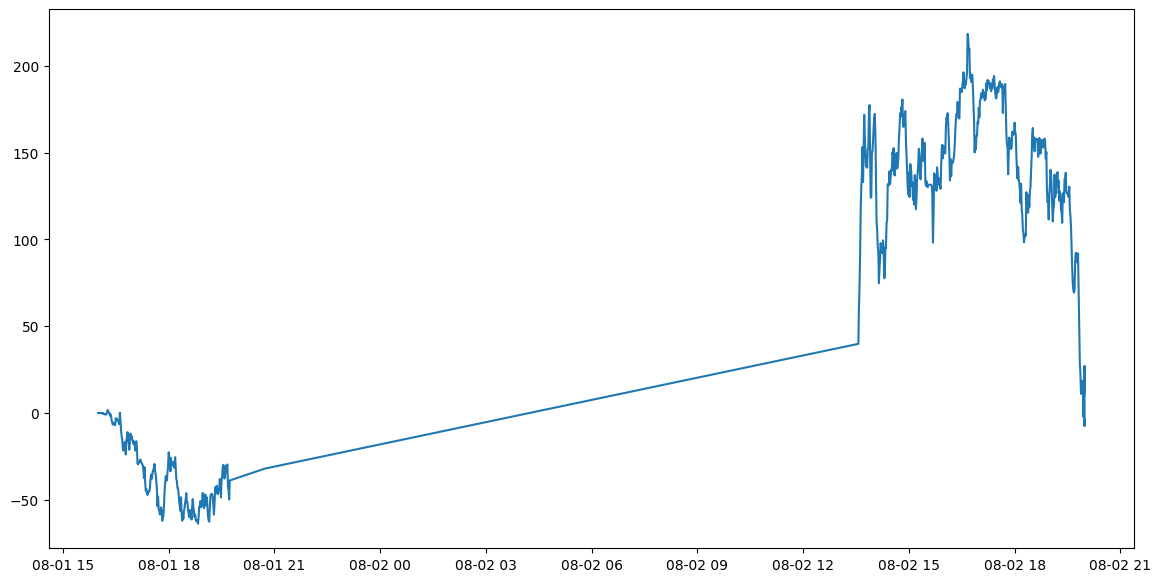

In [ ]:
# testing excel storage

live_test = pd.read_excel(live_path)
live_test.index = live_test['time']

plt.figure(figsize=(14, 7))
plt.plot(live_test['PnL'])